#Housing in Mexico
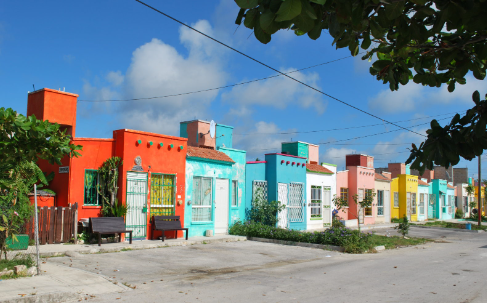


## Import Libraries

In [2]:
import pandas as pd


##load Datasets


The first part of any data science project is preparing our data, which means making sure its in the right place and format for us to conduct our analysis. The first step of any data preparation is importing our raw data and cleaning it.

In [21]:
df1 = pd.read_csv("/content/drive/MyDrive/data/mexico-real-estate-1.csv",encoding='latin-1',index_col=0)
df2 = pd.read_csv("/content/drive/MyDrive/data/mexico-real-estate-2.csv",encoding='latin-1',index_col=0)
df3 = pd.read_csv("/content/drive/MyDrive/data/mexico-real-estate-3.csv",encoding='latin-1',index_col=0)

Now that I have  three DataFrames, it's time to inspect them to see if they need any cleaning. Let's look at them one-by-one.

##**Explore df1**
Inspect first dataframe using the shape, info, and head in pandas.


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 38.3+ KB


In [23]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


It looks like there are a couple of problems in this DataFrame that I need to solve. First, there are many rows with `NaN` values in the `"lat"` and `"lon"` columns. Second, the data type for the `"price_usd"` column is `object` when it should be `float`. 

In [24]:
#check numbers of null values
df1.isnull().sum()
#the data contains 117 null values from 700 row

property_type      0
state              0
lat              117
lon              117
area_m2            0
price_usd          0
dtype: int64

###clean df1


Clean df1 by dropping rows with NaN values. Then remove the "$" and "," characters from "price_usd" and recast the values in the column as floats.

In [25]:
df1.dropna(axis=0,subset=["lat","lon"],inplace = True)
df1["price_usd"]=df1["price_usd"].str.replace("$","",regex=False).str.replace(",","").astype(float)


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 700
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    int64  
 5   price_usd      583 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.9+ KB


##**Explore df2**




In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 38.3+ KB


In [28]:
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn
1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
2,apartment,Puebla,NaN,NaN,190,2500000
3,house,Morelos,23.634501,-102.552788,360,5300000
4,house,Morelos,NaN,NaN,76,820000
5,house,Puebla,NaN,NaN,200,1100000


In [29]:
df2.shape

(700, 6)

I have noticed that it has the same issue of NaN values, but there's a new problem, too: The home prices are in Mexican pesos ("price_mxn"), not US dollars ("price_usd"). If I want to compare all the home prices in this dataset, they all need to be in the same currency.

### Clean df2

First, I will drop rows with NaN values in df2. Next, will use the "price_mxn" column to create a new column named "price_usd". 

note:(when this data was collected in 2014, a dollar cost 19 pesos.)

Finally, drop the "price_mxn" from the DataFrame.

In [30]:
df2.dropna(axis=0,subset=["lat","lon"],inplace = True)
df2["price_usd"] = (df2["price_mxn"]/19).round(2)
df2.drop(columns= ["price_mxn"],inplace=True)
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
1,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
3,house,Morelos,23.634501,-102.552788,360,278947.37
7,apartment,Estado de México,19.272040,-99.572013,85,65789.47
8,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
9,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


##**Explore df3**


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.8+ KB


In [32]:
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [33]:
df3.shape

(700, 5)

I have notice that I still have NaN values, but there are two new problems:


1.   Instead of separate "lat" and "lon" columns, there's a single "lat-lon" column.
2.   Instead of a "state" column, there's a "place_with_parent_names" column.




###Clean df3

 Drop rows with NaN values in df3. Then use the split method to create two new columns from "lat-lon" named "lat" and "lon", respectively.

In [36]:
df3.dropna(axis =0, inplace= True)
#expand : split them in separeate columns
df3[['lat','lon']]=df3["lat-lon"].str.split(",",expand=True)
df3.head()


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
6,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


Use the split method again, this time to extract the state for every house. (Note that the state name always appears after "México|" in each string.) Use this information to create a "state" column. 

Finally, drop the "place_with_parent_names" and "lat-lon" columns from the DataFrame.

In [39]:
df3["state"]=df3["place_with_parent_names"].str.split("|",expand=True)[2]
df3.drop(columns=["place_with_parent_names","lat-lon"],inplace= True)
df3.head()


,property_type,area_m2,price_usd,lat,lon,state
1,apartment,71,48550.59,19.52589,-99.151703,Distrito Federal
2,house,233,168636.73,19.2640539,-99.5727534,Estado de México
3,house,300,86932.69,19.268629,-99.671722,Estado de México
5,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
6,house,175,102763.00,20.689157,-103.366728,Jalisco


#Concatenate DataFrames
Use pd.concat to concatenate df1, df2, df3 as new DataFrame named df. 


In [40]:
df = pd.concat([df1,df2,df3])
print(df.shape)
df.head()

(1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
1,house,Estado de México,19.560181,-99.233528,150,67965.56
2,house,Nuevo León,25.688436,-100.198807,186,63223.78
3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
6,house,Yucatán,21.052583,-89.538639,205,105191.37


In [41]:
df.shape

(1736, 6)

The new DataFrame have 1,736 rows and 6 columns:"property_type", "state", "lat", "lon", "area_m2", "price_usd", and "price_per_m2".

#Save df
The data is clean and in a single DataFrame, and now I need to save it as a CSV file so that I can examine it in exploratory data analysis stage.

In [42]:
df.to_csv("mexico-real-estate-clean.csv",index=False)